<!--
Automatically generated HTML file from DocOnce source
(https://github.com/hplgit/doconce/)
-->
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="generator" content="DocOnce: https://github.com/hplgit/doconce/" />
<meta name="viewport" content="width=device-width, initial-scale=1.0" />
<meta name="description" content="Fourth and fifth days: Homework set 3">

<title>Fourth and fifth days: Homework set 3</title>


<style type="text/css">
/* bloodish style */

body {
  font-family: Helvetica, Verdana, Arial, Sans-serif;
  color: #404040;
  background: #ffffff;
}
h1 { font-size: 1.8em;  color: #8A0808; }
h2 { font-size: 1.6em;  color: #8A0808; }
h3 { font-size: 1.4em;  color: #8A0808; }
h4 { color: #8A0808; }
a { color: #8A0808; text-decoration:none; }
tt { font-family: "Courier New", Courier; }
/* pre style removed because it will interfer with pygments */
p { text-indent: 0px; }
hr { border: 0; width: 80%; border-bottom: 1px solid #aaa}
p.caption { width: 80%; font-style: normal; text-align: left; }
hr.figure { border: 0; width: 80%; border-bottom: 1px solid #aaa}

div { text-align: justify; text-justify: inter-word; }
</style>


</head>

<!-- tocinfo
{'highest level': 2,
 'sections': [('Day three and four exercises', 2, None, '___sec0'),
	      ('Exercise 1, Bias-Variance tradeoff and Bootstrap',
	       3,
	       None,
	       '___sec1'),
	      ('Part (1a) Proving the bias-variance tradeoff',
	       3,
	       None,
	       '___sec2'),
	      ('Part (1b) Adding Bootstrap and Bias-Variance Tradeoff',
	       3,
	       None,
	       '___sec3'),
	      ('Exercise 2, Linear Regression for  a two-dimensional function',
	       3,
	       None,
	       '___sec4'),
	      ('(2a) Ordinary Least Square on the Franke function  with '
	       'resampling',
	       3,
	       None,
	       '___sec5'),
	      ('Part (2b) Resampling techniques, adding more complexity',
	       3,
	       None,
	       '___sec6'),
	      ('Part (2c): Bias-variance tradeoff', 3, None, '___sec7'),
	      ('Part (2d): Ridge Regression on the Franke function  with '
	       'resampling',
	       3,
	       None,
	       '___sec8'),
	      ('Part (2e): Lasso Regression on the Franke function  with '
	       'resampling',
	       3,
	       None,
	       '___sec9')]}
end of tocinfo -->

<body>



<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: {
     equationNumbers: {  autoNumber: "AMS"  },
     extensions: ["AMSmath.js", "AMSsymbols.js", "autobold.js", "color.js"]
  }
});
</script>
<script type="text/javascript" async
 src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-AMS-MML_HTMLorMML">
</script>



    
<!-- ------------------- main content ---------------------- -->



<center><h1>Fourth and fifth days: Homework set 3</h1></center>  <!-- document title -->

<p>
<!-- author(s): Data Analysis and Machine Learning -->

<center>
<b>Data Analysis and Machine Learning</b> 
</center>

<p>
<!-- institution(s) -->

<br>
<p>
<center><h4>Jun 21, 2020</h4></center> <!-- date -->
<br>

<h2 id="___sec0">Day three and four exercises </h2>

<p>
The exercises here are somewhat longer and we expect to use at least two days on them.

<h3 id="___sec1">Exercise 1, Bias-Variance tradeoff and Bootstrap  </h3>

<p>
This exercise is a continuation of exercise 2 from the second homework set.
In that exercise we computed the MSE and \( R2 \)-score for the training
data and the test data as functions of the complexity of a polynomial,
that is the degree of a given polynomial.

<p>
One of the aims of that exercise was 
to reproduce Figure 2.11 of <a href="https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf" target="_blank">Hastie et al</a>.

<p>
Our data is defined by \( x\in [-3,3] \) with a total of for example \( 100 \) data points.
<p>

<!-- code=python (!bc pycod) typeset with pygments style "default" -->
<div class="highlight" style="background: #f8f8f8"><pre style="line-height: 125%"><span></span>np<span style="color: #666666">.</span>random<span style="color: #666666">.</span>seed()
n <span style="color: #666666">=</span> <span style="color: #666666">100</span>
maxdegree <span style="color: #666666">=</span> <span style="color: #666666">14</span>
<span style="color: #408080; font-style: italic"># Make data set.</span>
x <span style="color: #666666">=</span> np<span style="color: #666666">.</span>linspace(<span style="color: #666666">-3</span>, <span style="color: #666666">3</span>, n)<span style="color: #666666">.</span>reshape(<span style="color: #666666">-1</span>, <span style="color: #666666">1</span>)
y <span style="color: #666666">=</span> np<span style="color: #666666">.</span>exp(<span style="color: #666666">-</span>x<span style="color: #666666">**2</span>) <span style="color: #666666">+</span> <span style="color: #666666">1.5</span> <span style="color: #666666">*</span> np<span style="color: #666666">.</span>exp(<span style="color: #666666">-</span>(x<span style="color: #666666">-2</span>)<span style="color: #666666">**2</span>)<span style="color: #666666">+</span> np<span style="color: #666666">.</span>random<span style="color: #666666">.</span>normal(<span style="color: #666666">0</span>, <span style="color: #666666">0.1</span>, x<span style="color: #666666">.</span>shape)
</pre></div>
<p>
where \( y \) is the function we want to fit with a given polynomial.

<h3 id="___sec2">Part (1a) Proving the bias-variance tradeoff </h3>

<p>
Consider a
dataset \( \mathcal{L} \) consisting of the data
\( \mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\} \).

<p>
Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

<p>
Here \( \epsilon \) is normally distributed with mean zero and standard
deviation \( \sigma^2 \).

<p>
In our derivation of the ordinary least squares method we defined then
an approximation to the function \( f \) in terms of the parameters
\( \boldsymbol{\beta} \) and the design matrix \( \boldsymbol{X} \) which embody our model,
that is \( \boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta} \).

<p>
The parameters \( \boldsymbol{\beta} \) are in turn found by optimizing the means
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

<p>
Show that you can rewrite  this as
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

<p>
Explain what the terms mean, which one is the bias and which one is
the variance and discuss their interpretations.

<h3 id="___sec3">Part (1b) Adding Bootstrap and Bias-Variance Tradeoff </h3>

<p>
Add now bootstrapping as discussed in the <a href="https://compphysics.github.io/MLErasmus/doc/pub/Regression/html/Regression.html" target="_blank">Regression lectures</a> (scroll down to the bias-variance code).
Add also the expressions for the bias and the variance as discussed above.

<p>
Discuss the bias and variance tradeoff as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data.

<p>
Try to make a figure similar to Fig. 2.11 of Hastie et al. You should include an analysis of the bias and variance for the test results. Figure 2.11 displays only the test and training MSEs while indicating regions of low/high bias and variance. You will most likely not get an
equally smooth curve! Note also that when you calculate the bias, in all applications you don't know the function values \( f_i \). You would hence replace them with the actual data points \( y_i \).

   

**I already did this essentially in the previous exercise set!**

<h3 id="___sec4">Exercise 2, Linear Regression for  a two-dimensional function  </h3>

<p>
This is a longer  exercise and the aim is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
Ridge regression and finally Lasso regression.
The methods are in turn combined with resampling techniques.

<p>
We will study how to fit polynomials to a specific
two-dimensional function called <a href="http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf" target="_blank">Franke's
function</a>.  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
like the bootstrap from the previous exercise in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

<p>
The Franke function, which is a weighted sum of four exponentials  reads as follows
$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

<p>
The function will be defined for \( x,y\in [0,1] \).  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an \( x \) and \( y \) dependence of the form \( [x, y,
x^2, y^2, xy, \dots] \). We will also include cross-validation (or bootstrap) as
resampling technique.  As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for \( x \) and \( y \), or as in
the example below just a set of fixed 
values for \( x \) and \( y \) with a given step
size.  We will fit a
function (for example a polynomial) of \( x \) and \( y \).  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) \( \lambda \).

<p>
Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

<p>
The Python fucntion for the Franke function is included here (it performs also a three-dimensional plot of it)
<p>

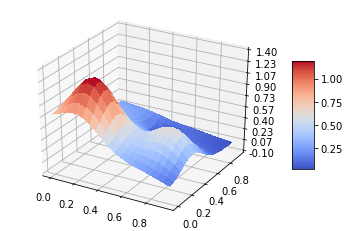

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<h3 id="___sec5">(2a) Ordinary Least Square on the Franke function  with resampling </h3>

<p>
We will generate our own dataset for a function
\( \mathrm{FrankeFunction}(x,y) \) with \( x,y \in [0,1] \). The function
\( f(x,y) \) is the Franke function. You should explore also the addition
an added stochastic noise to this function using the normal
distribution \( \cal{N}(0,1) \).

<p>
Write your own code (using either a matrix inversion or a singular
value decomposition from e.g., <b>numpy</b> ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in \( x \) and \( y \) up to fifth order. You can use <b>scikit-learn</b> as well.

<p>
Evaluate the Mean Squared error (MSE)

$$ MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2, 
$$

<p>
and the \( R^2 \) score function.  If \( \tilde{\hat{y}}_i \) is the predicted
value of the \( i-th \) sample and \( y_i \) is the corresponding true value,
then the score \( R^2 \) is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

<p>
where we have defined the mean value  of \( \hat{y} \) as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

<p>
To set up the design matrix, the following code can be used
<p>

In [46]:
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)		# Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            #print("i, k, q:", i, k, q)
            X[:,q+k] = (x**(i-k))*(y**k)

    return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    
X.shape

(1000, 21)

In [8]:
z.shape

(1000,)

In [9]:
import sklearn.model_selection
import sklearn.pipeline
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.metrics
import sklearn.utils
import seaborn as sns

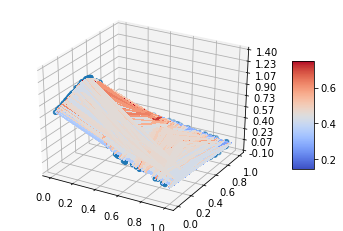

In [155]:
# Make data.
n_points = 1000
x = np.random.uniform(0, 1, n_points)
y = np.random.uniform(0, 1, n_points)

sigma_z = 0.0

z = FrankeFunction(x, y)+sigma_z*np.random.randn(n_points)
z = z[:, np.newaxis]

x_mesh, y_mesh = np.meshgrid(x,y)

z_mesh = FrankeFunction(x_mesh, y_mesh) + sigma_z*np.random.randn(n_points, n_points)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.scatter(x, y, z)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Polynomial degree: 0 shape of X: (1000, 1)
Error: 0.07644677509360444
Bias^2: 0.07633574008919142
Var: 0.00011103500441302243
0.07644677509360444 >= 0.07633574008919142 + 0.00011103500441302243 = 0.07644677509360444

Polynomial degree: 1 shape of X: (1000, 3)
Error: 0.09094104930547055
Bias^2: 0.09074357156292709
Var: 0.00019747774254345692
0.09094104930547055 >= 0.09074357156292709 + 0.00019747774254345692 = 0.09094104930547055

Polynomial degree: 2 shape of X: (1000, 6)
Error: 0.07895793026151669
Bias^2: 0.07856275307207744
Var: 0.00039517718943924747
0.07895793026151669 >= 0.07856275307207744 + 0.00039517718943924747 = 0.07895793026151669

Polynomial degree: 3 shape of X: (1000, 10)
Error: 0.0764492868390922
Bias^2: 0.07602530011298918
Var: 0.00042398672610301946
0.0764492868390922 >= 0.07602530011298918 + 0.00042398672610301946 = 0.0764492868390922

Polynomial degree: 4 shape of X: (1000, 15)
Error: 0.07533041878302799
Bias^2: 0.07482225342968957
Var: 0.0005081653533384297
0.07533

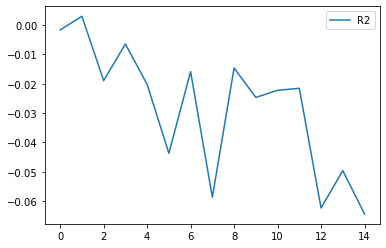

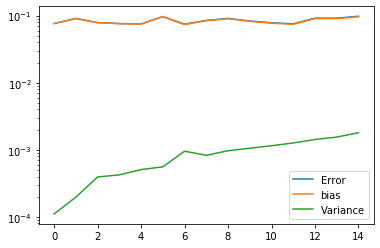

In [165]:
n_bootstraps = 200
maxdegree = 15
    
error = np.zeros(maxdegree)
R2 = np.zeros(maxdegree)
coeff = maxdegree*[None]
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

for degree in range(0, maxdegree):
    
    X = create_X(x, y, n=degree)
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, z, test_size=0.2)
    #print(x.shape, y.shape, z.shape, X.shape, x_train.shape, y_train.shape)
    print('\nPolynomial degree:', degree, "shape of X:", X.shape)
    
    # choose type of scaler
    #scaler = sklearn.preprocessing.StandardScaler()
    #scaler = sklearn.preprocessing.Normalizer()
    #scaler = sklearn.preprocessing.RobustScaler()
    #scaler.fit(x_train)
    #x_train = scaler.transform(x_train)
    #x_test = scaler.transform(x_test)
    
    model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x_train, y_train)
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    R2_tmp = np.empty(n_bootstraps)
    coeff_tmp = np.empty((n_bootstraps, X.shape[1]))
    
    for i in range(n_bootstraps):
        x_, y_ = sklearn.utils.resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()
        R2_tmp[i] = model.score(x_test, y_test)
        coeff_tmp[i, :] = model.coef_
    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    R2[degree] = np.mean(R2_tmp)
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    if degree == 0:
        #print("Coeff:", np.mean(coeff_tmp))
        coeff[degree] = np.mean(coeff_tmp)
    else:
        #print("Coeff:", np.mean(coeff_tmp, axis=0))
        coeff[degree] = np.mean(coeff_tmp, axis=0)

    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.figure()
plt.plot(polydegree, R2, label='R2')
plt.legend()

plt.figure()
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.yscale('log')
plt.legend()
plt.show()

Visualise best fit:

In [154]:
z_pred

array([1.72943768e+10, 1.72943768e+10, 1.72943768e+10, ...,
       1.72943768e+10, 1.72943768e+10, 1.72943768e+10])

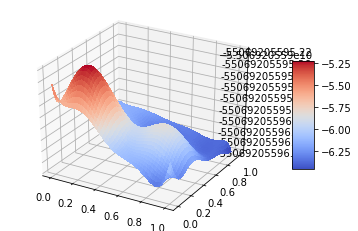

In [162]:
degree = 8

n_points = 1000
x = np.linspace(0, 1, n_points)
y = np.linspace(0, 1, n_points)

x_mesh, y_mesh = np.meshgrid(x,y)

z_pred = np.dot(create_X(x_mesh, y_mesh, n=degree), coeff[degree])
z_mesh = np.reshape(z_pred, (x.shape[0], y.shape[0]))

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<h3 id="___sec6">Part (2b) Resampling techniques, adding more complexity </h3>

<p>
Perform a resampling of the data where you split the data in training
data and test data. Here you can write your own function or use the
function for splitting training data provided by <b>Scikit-Learn</b>.
This function is called \( train\_test\_split \).   You should also renormalize your data.

<p>
It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (sometimes also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately \( 2/3 \) to \( 4/5 \) of the data as training data.

<p>
Use then the _bootstrap code you developed in the previous exercise to resample your data
and evaluate again the MSE function resulting
from the test data.

<h3 id="___sec7">Part (2c): Bias-variance tradeoff </h3>

<p>
With a code which does OLS and includes bootstrap
we will now discuss the bias-variance tradeoff in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms.

<p>
Use the code from exercise 1 above and implement the bootstrap
resampling and perform a bias-variance tradeoff analysis like you did
in exercise 1.

<h3 id="___sec8">Part (2d): Ridge Regression on the Franke function  with resampling </h3>

<p>
Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition ir use <b>scikit-learn</b> 
Perform the same analysis as in the
previous three steps (for the same polynomials and include resampling
techniques) but now for different values of \( \lambda \). Compare and
analyze your results with those obtained in parts 2a-2c). Study the
dependence on \( \lambda \).

<p>
Study also the bias-variance tradeoff as function of various values of
the parameter \( \lambda \). Comment your results.

<h3 id="___sec9">Part (2e): Lasso Regression on the Franke function  with resampling </h3>

<p>
This part is essentially a repeat of the previous ones, but now
with Lasso regression. Write either your own code or
use the functionalities of <b>Scikit-Learn</b> (recommended). 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.

<p>

<!-- ------------------- end of main content --------------- -->


</body>
</html>
    